# Plot one json file from the ARC challenge
by Jack Cole (Parapraxis), Mindware Consulting, Inc.

Some code adapted from https://www.kaggle.com/code/boliu0/visualizing-all-task-pairs-with-gridlines/notebook.

Select the file in the 3rd code box.

In [ ]:
%pip install ipyfilechooser

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import ipyfilechooser as fc

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors

In [5]:
show_results_only = False

data_folder = Path('./')
fchoose = fc.FileChooser(data_folder)
display(fchoose)




FileChooser(path='C:\Users\Acer\Desktop\ARC Challenge\my_arc_repo_github', filename='', title='', show_hidden=…

In [6]:
def plot_one(ax, task, i,train_or_test,input_or_output, extra_text='', result_index=0):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    if input_or_output=='result':
        input_matrix = task[train_or_test][i][input_or_output][result_index]
    else:
        input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if input_or_output=='result':
        ax.set_title(extra_text + ' ' + str(result_index+1))
    else:
        ax.set_title(train_or_test + ' '+input_or_output)
    

def plot_task(task, extra_result_text=[]):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    # skip the train plots if show_results_only is True
    if show_results_only==False:
        num_train = len(task['train'])
        fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
        for i in range(num_train):     
            plot_one(axs[0,i],task,i,'train','input')
            plot_one(axs[1,i],task,i,'train','output')
        plt.tight_layout()
        plt.show()        
        
    
    num_test = len(task['test'])
 
    if num_test==1:
        fig, axs = plt.subplots(1, 2, figsize=(3*2,3*3))
    else:
        fig, axs = plt.subplots(3, num_test, figsize=(3*num_test,3*3))
    
    if num_test==1: 
        plot_one(axs[0],task,0,'test','input')
        plot_one(axs[1],task,0,'test','output')
        #plot_one(axs[2],0,'test','result', extra_result_text)
    else:
        for i in range(num_test):      
            plot_one(axs[0,i],task,i,'test','input')
            plot_one(axs[1,i],task,i,'test','output')  
    plt.tight_layout()
    plt.show() 

    

task  C:\Users\Acer\Desktop\ARC Challenge\Data\parapraxis\2022_07_31_01.json


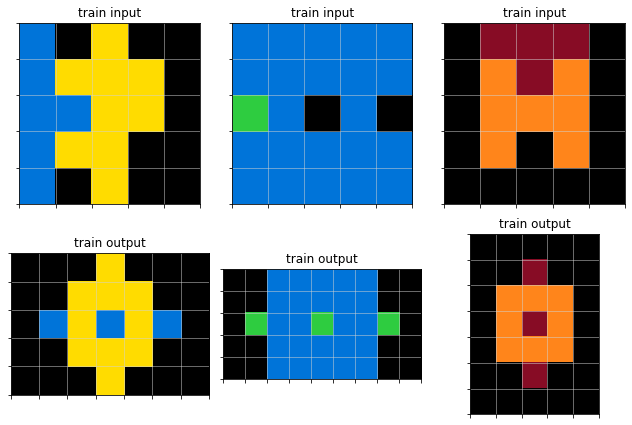

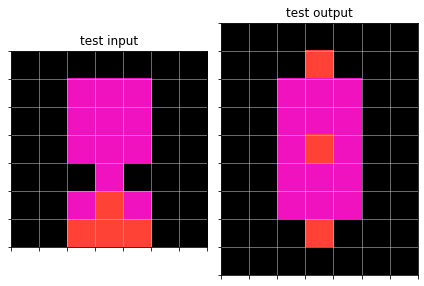

In [7]:
task_file = fchoose.selected
with open(task_file, 'r') as f:
    task = json.load(f)
    print("task ",task_file)
    plot_task(task, [task_file])